In [5]:
from pyopenms import *
import matplotlib.pyplot as plt

In [10]:
protein_ids = []
peptide_ids = []
SimpleSearchEngineAlgorithm().search("Fusion_180220_15.mzML", "Scerevisiae_UPS2_1802.fasta", protein_ids, peptide_ids)
exp = MSExperiment()
MzMLFile().load("Fusion_180220_15.mzML", exp)
filtered = MSExperiment()
for s in exp:
    if s.getMSLevel() == 2:
        filtered.addSpectrum(s)

In [7]:
def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
            obs_int = [element / max(obs_int) for element in obs_int] 
            theo_int = [element * -1 for element in theo_int] 
            plt.figure(figsize=(12,8))
            plt.bar(obs_mz, obs_int, width = 3.0)
            plt.bar(theo_mz, theo_int, width = 3.0)
            plt.title(title)
            plt.ylabel('intensity')
            plt.xlabel('m/z')

In [8]:
theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
for peptide_id in peptide_ids[0:100]:
    print (35*"=")
    print ("Peptide ID m/z:", peptide_id.getMZ()) 
    for hit in peptide_id.getHits():
        print(" - Peptide hit rank:", hit.getRank())
        print(" - Peptide hit sequence:", hit.getSequence())  
        spectra = filtered.getSpectrum(peptide_id.getMetaValue("scan_index"))
        tsg = TheoreticalSpectrumGenerator()
        thspec = MSSpectrum()
        p = Param()
        p.setValue("add_metainfo", "true")
        tsg.setParameters(p)
        peptide = AASequence.fromString(hit.getSequence().toString())
        tsg.getSpectrum(thspec, peptide, 1, 2)
        
        alignment = []
        spa = SpectrumAlignment()
        p = spa.getParameters()
        
        p.setValue("tolerance", 0.5)
        p.setValue("is_relative_tolerance", "false")
        spa.setParameters(p)

        spa.getSpectrumAlignment(alignment, thspec, spectra)

        print("Number of matched peaks: " + str(len(alignment)))
        print("ion\ttheo. m/z\tobserved m/z")
        for theo_idx, obs_idx in alignment:
            ion_name = thspec.getStringDataArrays()[0][theo_idx].decode()
            ion_charge = thspec.getIntegerDataArrays()[0][theo_idx]
            print(ion_name + "\t" + str(ion_charge) + "\t"
                  + str(thspec[theo_idx].getMZ())
                  + "\t" + str(spectra[obs_idx].getMZ()))

        
        for theo_idx, obs_idx in alignment:
            theo_mz.append(thspec[theo_idx].getMZ())
            theo_int.append(thspec[theo_idx].getIntensity())
            obs_mz.append(spectra[obs_idx].getMZ())
            obs_int.append(spectra[obs_idx].getIntensity())

Peptide ID m/z: 590.80517578125
 - Peptide hit rank: 1
 - Peptide hit sequence: C(Carbamidomethyl)LNIAHPVEK
Number of matched peaks: 10
ion	theo. m/z	observed m/z
y5++	2	305.17138316857097	305.1584167480469
y6++	2	340.68994024832097	340.50830078125
b8++	2	453.23673185257104	452.76519775390625
y4+	1	472.27657764707106	472.6123046875
b4+	1	501.248982345171	501.49847412109375
y9++	2	510.795468694921	510.70867919921875
b5+	1	572.286096504671	571.8028564453125
y5+	1	609.335489870371	609.3307495117188
b8+	1	905.466187238371	905.0306396484375
y9+	1	1020.5836609230711	1020.315673828125
Peptide ID m/z: 490.781860351563
 - Peptide hit rank: 1
 - Peptide hit sequence: HHLGIFQK
Number of matched peaks: 11
ion	theo. m/z	observed m/z
y1+	1	147.112804913371	147.19354248046875
b4++	2	223.118952913371	223.0184326171875
y4++	2	268.16556913667097	268.07733154296875
b2+	1	275.12510091337106	275.0852355957031
b5++	2	279.660985088821	279.4521484375
b6++	2	353.195192232371	353.19866943359375
b3+	1	388.209165

 - Peptide hit sequence: VTVAGIIGSSR
Number of matched peaks: 15
ion	theo. m/z	observed m/z
y5++	2	260.14790807287096	260.14447021484375
y2+	1	262.15098207287105	262.3525390625
b6++	2	271.170851668571	271.40704345703125
y6++	2	316.68994024832097	316.8996276855469
y7++	2	345.200672296171	345.1126708984375
y3+	1	349.18301123237103	348.9528503417969
b4+	1	371.228898423771	370.9924621582031
b9++	2	399.739630471621	399.7044677734375
b10++	2	443.255645051371	442.97357177734375
y10++	2	480.77727613112097	480.33172607421875
y5+	1	519.288539678971	519.3187255859375
b7+	1	654.418491221271	654.520751953125
b9+	1	798.471984476471	798.4769287109375
y9+	1	859.4995965721711	859.342041015625
b10+	1	885.504013635971	885.9835205078125
Peptide ID m/z: 472.771118164063
 - Peptide hit rank: 1
 - Peptide hit sequence: ELTVLQNK
Number of matched peaks: 12
ion	theo. m/z	observed m/z
b4++	2	222.128652509071	222.22715759277344
y4++	2	251.65282608882103	251.37298583984375
b5++	2	278.670684684521	278.776428222656

Number of matched peaks: 9
ion	theo. m/z	observed m/z
y3+	1	347.19251329617106	347.32177734375
b10++	2	540.244951948271	540.305419921875
y10++	2	560.7687915599209	560.647216796875
y5+	1	604.275926504671	604.0694580078125
b11++	2	604.766249059921	604.8257446289062
b6+	1	623.303521806571	623.25390625
y11++	2	634.302998703471	633.97119140625
y8+	1	932.450598270271	932.4439697265625
y11+	1	1267.598720940171	1267.540283203125
Peptide ID m/z: 644.83203125
 - Peptide hit rank: 1
 - Peptide hit sequence: LC(Carbamidomethyl)HGALYADLR
Number of matched peaks: 9
ion	theo. m/z	observed m/z
b3+	1	411.180902026171	410.73095703125
y4+	1	474.26707558327104	474.1197204589844
b9++	2	501.229104352571	501.21826171875
b5+	1	539.239480281371	538.9695434570312
b10++	2	557.771136528021	557.4952392578125
y10++	2	588.284942575871	588.4906005859375
y5+	1	637.330404870371	637.3271484375
b6+	1	652.323544632271	652.336669921875
y10+	1	1175.562608684971	1175.40283203125
Peptide ID m/z: 516.797607421875
 - Peptide hi

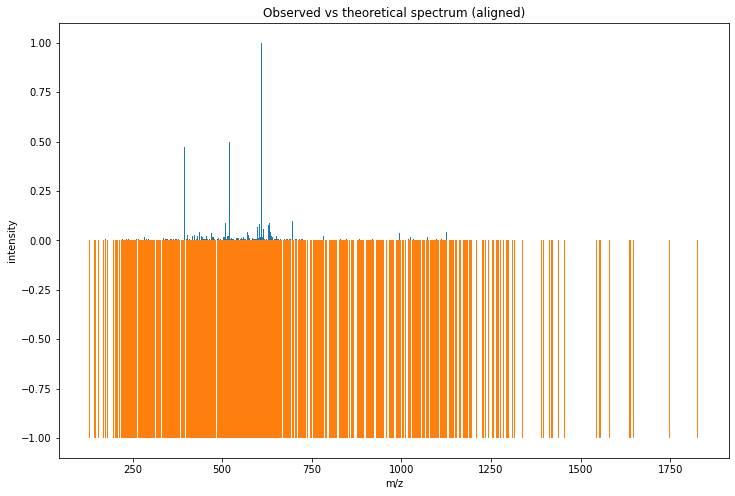

In [9]:
title = 'Observed vs theoretical spectrum (aligned)'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)